## Required Libraries for Detecting Fake News through LSTM 

In [1]:
import pandas as pd
import numpy as np

#### Reading a Dataset

In [2]:
df = pd.read_csv(r'D:\Deep Learning - Self\Datasets\fake_news.csv')
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [3]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Features: {}'.format(df.shape[1]))

Number of Rows: 4009
Number of Features: 4


In [4]:
df.isna().sum()
## Checking NaN values in each features

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [5]:
print('Null values contains {:.2f}% in Body Features'.format((21/4009)*100))

Null values contains 0.52% in Body Features


In [6]:
## Hence it is okay to drop NaN values
df.dropna(inplace=True)

## resetting the index
df.reset_index(inplace=True)

print('Number of Rows after dropping NaN values: {}'.format(df.shape[0]))

Number of Rows after dropping NaN values: 3988


In [7]:
## I'll need only 'Headline' feature for further operations wheather the particular headline is real news or a fake news
X = df['Headline']

## and the output classification feature where 0 being Real News and 1 being Fake News
y = df['Label']

In [8]:
print('Number of Real news in Label Feature: {}'.format(y.value_counts()[0]))
print('Number of Fake News in Label Feature: {}'.format(y.value_counts()[1]))

Number of Real news in Label Feature: 2120
Number of Fake News in Label Feature: 1868


#### One Hot Representation

In [9]:
import nltk
import re
from nltk.corpus import stopwords

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Data Preprocessing

In [11]:
from nltk.stem.porter import PorterStemmer
## Used for stemming

In [12]:
ps = PorterStemmer()
sentence_list = []

In [13]:
for i in range(0,len(X)):
    review = re.sub('[^a-zA-z]',' ',X[i]) 
    ## apart from a-z & A-Z, substitute everything with ' ' - (blank space) X
    
    review = review.lower()
    ## lower every sentences
    
    review = review.split()
    ## list of words in each sentence
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    ## if word is not present in stopwords then proceed with stemming
    
    review = ' '.join(review)
    sentence_list.append(review)

In [14]:
sentence_list

['four way bob corker skewer donald trump',
 'linklat war veteran comedi speak modern america say star',
 'trump fight corker jeopard legisl agenda',
 'egypt cheiron win tie pemex mexican onshor oil field',
 'jason aldean open snl vega tribut',
 'jetnat fanduel leagu week',
 'kansa tri tax plan similar trump fail',
 'india rbi chief growth import cost inflat newspap',
 'epa chief sign rule clean power plan exit tuesday',
 'talk sale air berlin plane easyjet risk collaps report',
 'u presid donald trump quietli sign law allow warrantless search part va dc md',
 'fantasi footbal team defens rank week',
 'shut play damn basebal',
 'deloitt cyber attack affect client guardian',
 'chuck axe hbd brickyard adam moonlight ace chuck season final',
 'gunman girlfriend said know plan harm',
 'maril danley gunman girlfriend say unawar plan',
 'trump immigr rhetor echo bitter fight',
 'trump bemoan littl appreci san juan mayor beg water',
 'meet militari trump talk calm storm',
 'teacher spark outr

In [16]:
from tensorflow.keras.preprocessing.text import one_hot

## Vocabulary Size
voc_size = 7000

onehot_repr = [one_hot(word,voc_size) for word in sentence_list]
## giving an index based on vocabulary size

## also a thing to notice that the all the sentences in the given 'sentence_list' is different.

In [17]:
## I want to know the max length in the 'sentence_list'
sentence_length = []
for i in sentence_list:
    #print(i)
    k=0
    review = i.split()
    for j in review:
        k = k+1
    sentence_length.append(k)

In [18]:
sentence_length.sort(reverse=True)
print('Maximum words in a Sentence: {}'.format(sentence_length[0]))

Maximum words in a Sentence: 68


#### Embedding Representation

In [19]:
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [20]:
## Padding Sequence -- equalizing all sentences 
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sentence_length[0])
## 'maxlen' - maximum number of words in a sentence is 68

embedded_docs
## techniaclly I've converted all the sentences into 68 words

array([[   0,    0,    0, ...,   44, 1208, 1674],
       [   0,    0,    0, ..., 2890, 4626, 6821],
       [   0,    0,    0, ...,  667, 5734, 1519],
       ...,
       [   0,    0,    0, ..., 1719, 5448,  991],
       [   0,    0,    0, ..., 5491, 6737, 5865],
       [   0,    0,    0, ..., 2205, 2424, 5157]])

In [21]:
embedded_docs.shape

(3988, 68)

In [22]:
## Create a Model
features = 50
model = Sequential()

## we know voc_size = 7000
model.add(Embedding(voc_size,features,input_length=68))
## input_length = Maximum Number of words in a 'sentence_list' ie. 68
## Embedding() - takes an input and converts to some specific features of vectors

model.add(LSTM(100))
## one LSTM layer with 100 Neurons

model.add(Dense(1,activation='sigmoid'))
## this is a classification problem, Therefore one final output and the value < output < 1

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 68, 50)            350000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 410,501
Trainable params: 410,501
Non-trainable params: 0
_________________________________________________________________


#### Model Training

In [24]:
X = np.array(embedded_docs)
y = np.array(y)

print(X.shape)
print(y.shape)

(3988, 68)
(3988,)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
## 70% data for training and 30% data for testing

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2791, 68)
(1197, 68)
(2791,)
(1197,)


In [27]:
model.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=20)

Epoch 1/10
112/112 [==============================] - 12s 46ms/step - loss: 0.7684 - accuracy: 0.6120 - val_loss: 0.5876 - val_accuracy: 0.7567
Epoch 2/10
112/112 [==============================] - 4s 34ms/step - loss: 0.3808 - accuracy: 0.8723 - val_loss: 0.4135 - val_accuracy: 0.8104
Epoch 3/10
112/112 [==============================] - 4s 33ms/step - loss: 0.1723 - accuracy: 0.9391 - val_loss: 0.4051 - val_accuracy: 0.8301
Epoch 4/10
112/112 [==============================] - 4s 38ms/step - loss: 0.0796 - accuracy: 0.9785 - val_loss: 0.4847 - val_accuracy: 0.8265
Epoch 5/10
112/112 [==============================] - 4s 34ms/step - loss: 0.0362 - accuracy: 0.9901 - val_loss: 0.5328 - val_accuracy: 0.8336
Epoch 6/10
112/112 [==============================] - 4s 33ms/step - loss: 0.0164 - accuracy: 0.9978 - val_loss: 0.6628 - val_accuracy: 0.8265
Epoch 7/10
112/112 [==============================] - 4s 34ms/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.6435 - val_accuracy: 0.817

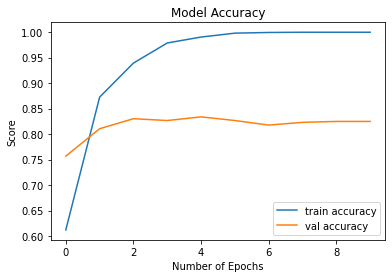

In [28]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy']);
plt.xlabel('Number of Epochs')
plt.ylabel('Score')
plt.title('Model Accuracy')
plt.legend(['train accuracy','val accuracy']);

#### Performance Metrics & Accuracy

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
y_pred = model.predict(X_test)

38/38 [==============================] - 1s 14ms/step


In [31]:
y_pred = y_pred > 0.5

confusion_matrix(y_test,y_pred)

array([[506, 110],
       [134, 447]], dtype=int64)

In [32]:
print('Accuracy Score on Test Data : {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy Score on Test Data : 79.62%


#### Adding Dropout to a Model

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
features = 50
model = Sequential()
model.add(Embedding(voc_size,features,input_length=sentence_length[0]))
model.add(Dropout(0.3))     ## Adding a dropout

model.add(LSTM(100))
model.add(Dropout(0.3))     ## Adding a dropout

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=64)

Epoch 1/10
35/35 [==============================] - 4s 76ms/step - loss: 0.6861 - accuracy: 0.5390 - val_loss: 0.6745 - val_accuracy: 0.5420
Epoch 2/10
35/35 [==============================] - 2s 62ms/step - loss: 0.5978 - accuracy: 0.7204 - val_loss: 0.5649 - val_accuracy: 0.7567
Epoch 3/10
35/35 [==============================] - 2s 70ms/step - loss: 0.4384 - accuracy: 0.8687 - val_loss: 0.4590 - val_accuracy: 0.7710
Epoch 4/10
35/35 [==============================] - 3s 72ms/step - loss: 0.2774 - accuracy: 0.9149 - val_loss: 0.4157 - val_accuracy: 0.8086
Epoch 5/10
35/35 [==============================] - 3s 71ms/step - loss: 0.1729 - accuracy: 0.9435 - val_loss: 0.4683 - val_accuracy: 0.8068
Epoch 6/10
35/35 [==============================] - 3s 73ms/step - loss: 0.1052 - accuracy: 0.9668 - val_loss: 0.4455 - val_accuracy: 0.8175
Epoch 7/10
35/35 [==============================] - 3s 72ms/step - loss: 0.0667 - accuracy: 0.9843 - val_loss: 0.4641 - val_accuracy: 0.8283
Epoch 8/10
35

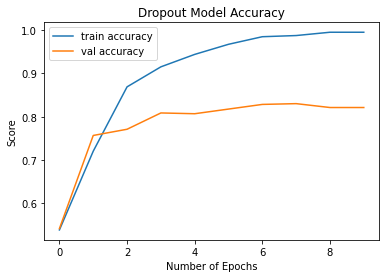

In [36]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy']);
plt.xlabel('Number of Epochs')
plt.ylabel('Score')
plt.title('Dropout Model Accuracy')
plt.legend(['train accuracy','val accuracy']);

In [37]:
y_pred = model.predict(X_test)

y_pred = y_pred > 0.5

38/38 [==============================] - 1s 12ms/step


In [38]:
confusion_matrix(y_test,y_pred)

array([[508, 108],
       [123, 458]], dtype=int64)

In [39]:
print('Accuracy Score for Dropout Model: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy Score for Dropout Model: 80.70%


### Summary

This is a Simple RNN LSTM model for detecting Fake News using 100 LSTM cells having Accuracy of 79.62 %.

And Accuracy of 80.7 % by adding Dropout to Same Model.

We can further increase the Accuracy by adding more Number of layers and LSTM.